# Pandas Cookbook

## 11장. Matplotlib, Pandas, Seaborn을 이용한 시각화 

https://github.com/PacktPublishing/Pandas-Cookbook/tree/master/data

### 소개

### matplotlib 다뤄 보기

### matplotlib에 대한 객체지향 가이드

Text(0.5,1.03,'FIgure Title')

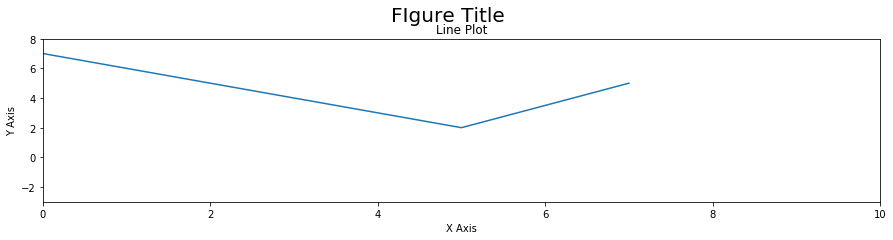

In [27]:
import matplotlib.pyplot as plt

x = [-3, 5, 7]
y = [10, 2, 5]

plt.figure(figsize=(15, 3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Plot')
plt.suptitle('FIgure Title', size =20, y =1.03) # subtitle 아님, suptitle

Text(0.5,1.03,'Figure Title')

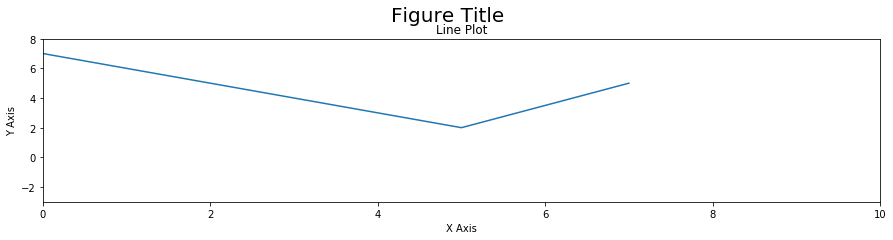

In [28]:
fig, ax = plt.subplots(figsize = (15, 3))
ax.plot(x,y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size = 20, y= 1.03)

In [29]:
import matplotlib.pyplot as plt

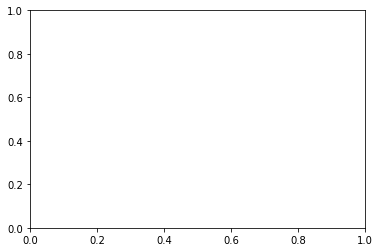

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

In [31]:
type(fig)

matplotlib.figure.Figure

In [32]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [33]:
fig.get_size_inches()

array([6., 4.])

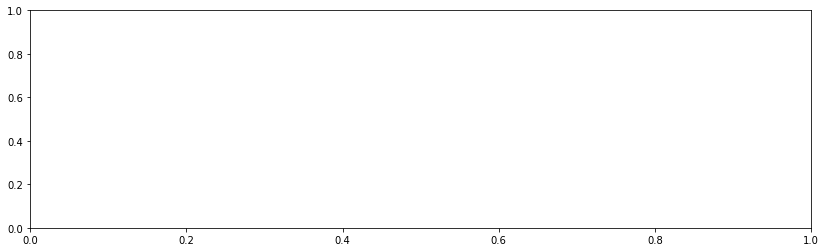

In [34]:
fig.set_size_inches(14, 4)
fig

In [35]:
fig.axes

In [36]:
fig.axes[0] is ax

True

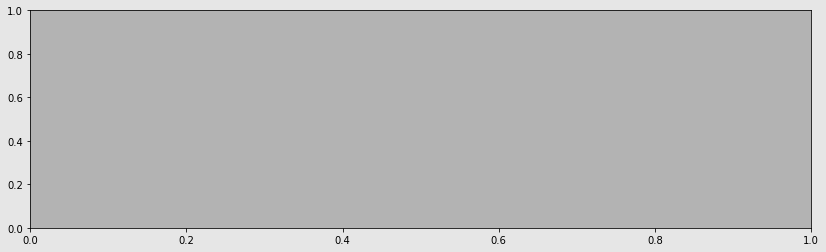

In [37]:
fig.set_facecolor('.9')
ax.set_facecolor('.7')
fig

In [38]:
ax_chidren =ax.get_children()
ax_chidren

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

In [39]:
spines = ax.spines
spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x11d77a4a8>),
             ('right', <matplotlib.spines.Spine at 0x11d77aeb8>),
             ('bottom', <matplotlib.spines.Spine at 0x11d77ad30>),
             ('top', <matplotlib.spines.Spine at 0x11d77aef0>)])

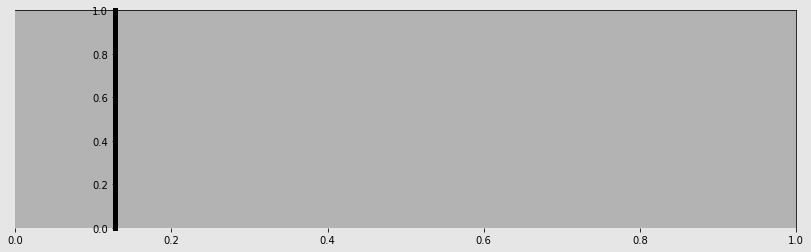

In [40]:
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)

spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


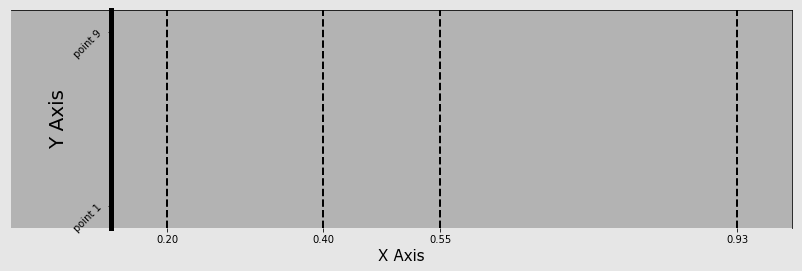

In [41]:
ax.xaxis.grid(True, which = 'major', linewidth = 2, color = 'black', linestyle = '--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family = 'Verdana', fontsize = 15)

ax.set_ylabel('Y Axis', family='Calibri', fontsize = 20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation = 45)
fig

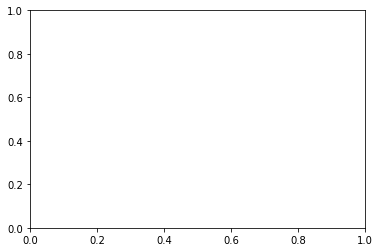

In [42]:
plot_objects = plt.subplots(nrows = 1, ncols = 1)
type(plot_objects)

fig = plot_objects[0]
ax = plot_objects[1] 

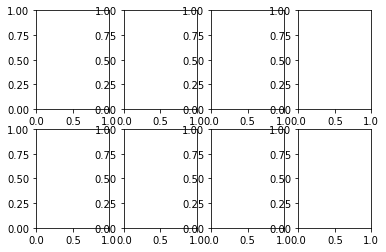

In [43]:
plot_objects = plt.subplots(2,4)

In [44]:
plot_objects[1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d6344e0>,
      dtype=object)

In [45]:
fig.axes == fig.get_axes()

True

In [47]:
ax.xaxis == ax.get_xaxis()

True

In [48]:
ax.yaxis == ax.get_yaxis()

True

In [49]:
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5,3.2,''),
  Text(1,4.2,''),
 'clip_box': TransformedBbox(
     Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0),
     CompositeGenericTransform(
         CompositeGenericTransform(
             BboxTransformTo(
                 Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)),
             Affine2D(
                 [[1. 0. 0.]
                  [0. 1. 0.]
                  [0. 0. 1.]])),
         BboxTransformTo(
             TransformedBbox(
                 Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88),
                 BboxTransformTo(
                     TransformedBbox(
                         Bbox(x0=0.0, y0=0.0, x1=6.0, y1=4.0),
                         Affine2D(
                             [[72.  0.  0.]
                              [ 0. 72.  0.]
                              [ 0.  0.  1.]]))))))),
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_interval': array([ inf, -inf]),
 'figure': <Figure size 432x2

- matplotlib 사용자 가이드 문서 : https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
- Axes 객체에 대한 모든 메서드 리스트 : https://matplotlib.org/api/axes_api.html
- 벤 루트(Ben Root)의 튜토리얼 해부 : https://www.youtube.com/watch?v=rARMKS8jE9g
- matplotlib 상태 module 모듈과 객체지향 기법의 공식문서 : https://matplotlib.org/api/pyplot_summary.html#the-pyplot-api
- Artist 튜토리얼에 대한 matplotlib 공식문서 : https://matplotlib.org/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py

### matplotlib를 이용한 데이터 시각화

In [54]:
import numpy as np
import pandas as pd
pwd = %pwd

In [58]:
movie = pd.read_csv(pwd + '/movie.csv')
med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [60]:
years = med_budget.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [61]:
budget = med_budget_roll.values
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

Text(0,0.5,'Millions of Dollars')

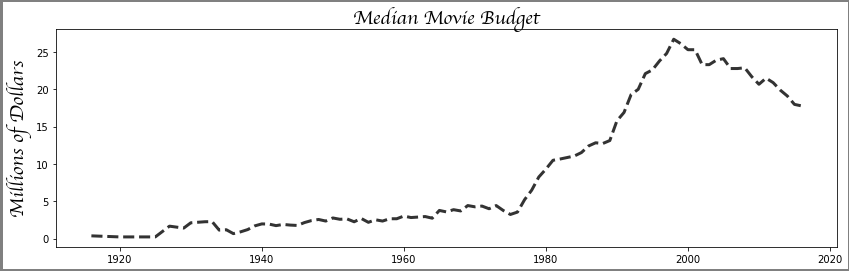

In [65]:
fig, ax = plt.subplots(figsize =(14,4), linewidth=5, edgecolor = '.5')
ax.plot(years, budget, linestyle = '--', linewidth = 3, color = '.2', label = 'All Movies')

text_kwargs = dict(fontsize = 20, family = 'cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

In [67]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

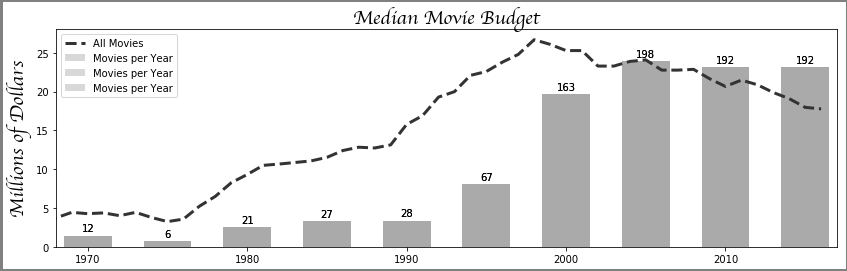

In [82]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

ax.bar(years_5, ct_norm_5, 3, facecolor = '.5', alpha = .3, label = 'Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha = 'center')
ax.legend()
fig

In [83]:
top10 = movie.sort_values('budget', ascending = False).groupby('title_year')['budget'].apply(lambda x: x.iloc[:10].median() / 1e6)
top10_roll = top10.rolling(5, min_periods = 1).mean()
top10_roll.tail()

title_year
2012.0    192.9
2013.0    195.9
2014.0    191.7
2015.0    186.8
2016.0    189.1
Name: budget, dtype: float64

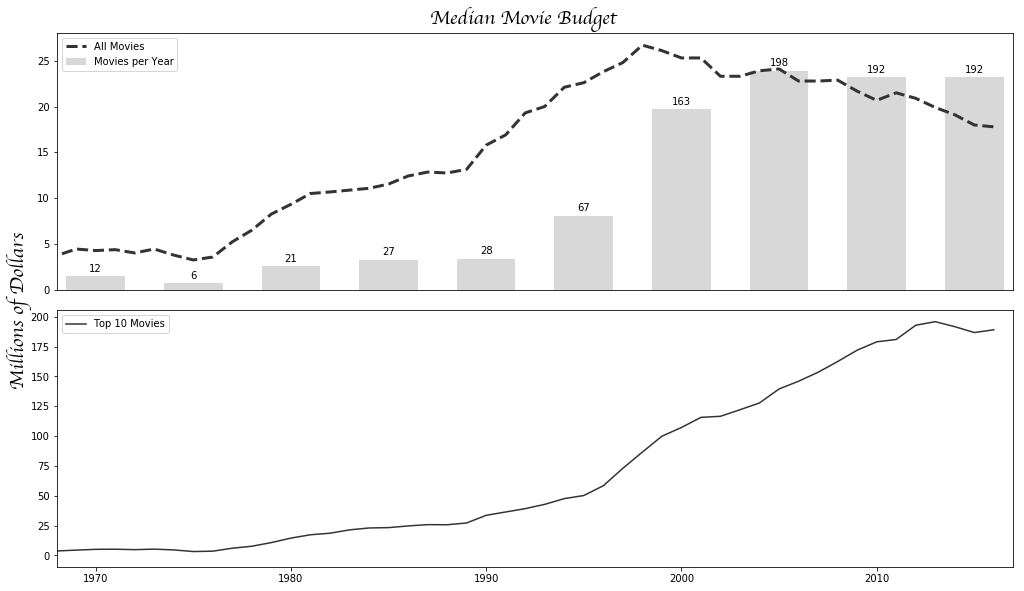

In [87]:
fig2, ax_array = plt.subplots(2, 1, figsize=(14,8), sharex = True)
ax1 = ax_array[0]
ax2 = ax_array[1]

ax1.plot(years, budget, linestyle = '--', linewidth = 3, color = '.2', label = 'All Movies')
ax1.bar(years_5, ct_norm_5, 3, facecolor = '.5', alpha=.3, label = 'Movies per Year')

ax1.legend(loc = 'upper left')
ax1.set_xlim(1968, 2017)
plt.setp(ax1.get_xticklines(), visible = False)

for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax1.text(x, y +.5, str(v), ha = 'center')
    
ax2.plot(years, top10_roll.values, color = '.2', label = 'Top 10 Movies')    
ax2.legend(loc = 'upper left')

fig2.tight_layout()
fig2.suptitle('Median Movie Budget', y = 1.02, **text_kwargs)
fig2.text(0, .6, 'Millions of Dollars', rotation = 'vertical', ha = 'center', **text_kwargs)

import os
path = os.path.expanduser(pwd + '/movie_budget.png')
fig2.savefig(path, bbox_inches = 'tight')

In [89]:
med_budget.loc[2012:2016].mean()

17.78

In [90]:
med_budget.loc[2011:2015].mean()

17.98

In [91]:
med_budget.loc[2010:2014].mean()

19.1

In [92]:
os.path.expanduser(pwd + '/movie_budget.png')

'/Users/chosikc/Sites/PandasCookbook/movie_budget.png'

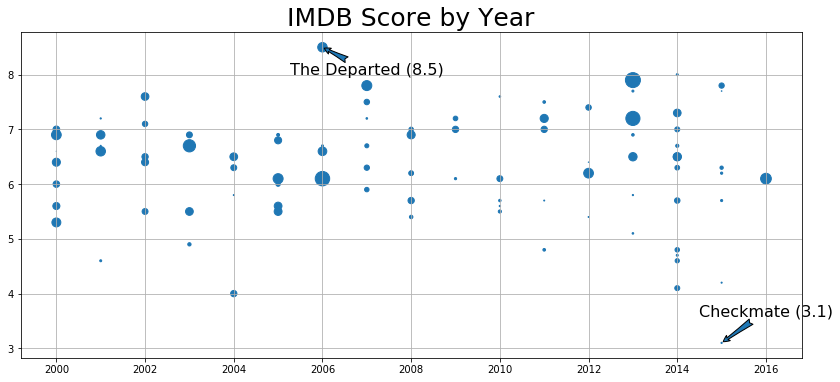

In [97]:
cols = ['budget', 'title_year', 'imdb_score', 'movie_title']
m  = movie[cols].dropna()
m['budget2'] = m['budget'] / 1e6
np.random.seed(0)
movie_samp = m.query('title_year >= 2000' ).sample(100)

fig, ax = plt.subplots(figsize = (14,6))
ax.scatter(x = 'title_year', y = 'imdb_score', s = 'budget2', data = movie_samp)

idx_min = movie_samp['imdb_score'].idxmin()
idx_max = movie_samp['imdb_score'].idxmax()

for idx, offset in zip([idx_min, idx_max], [.5, -.5]):
    year = movie_samp.loc[idx, 'title_year']
    score = movie_samp.loc[idx, 'imdb_score']
    title = movie_samp.loc[idx, 'movie_title']
    ax.annotate(xy = (year, score), xytext = (year + 1, score + offset), s = title + ' ({})'.format(score), ha = 'center', size = 16, arrowprops = dict(arrowstyle = "fancy"))

ax.set_title('IMDB Score by Year', size = 25)
ax.grid(True)

- Legend Guide의 Matplotlib 공식문서 : https://matplotlib.org/tutorials/intermediate/legend_guide.html
- scatter 메서드의 Matplotlib 공식문서 :  https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter
- Annotaition 가이드의 Matplotlib 공식문서 : https://matplotlib.org/users/annotations.html

### Pandas를 이용한 도식화 기초

In [98]:
df = pd.DataFrame(index = ['Atiya', 'Abbas', 'Cornelia', 'Stepphanie', 'Month'], data = {'Apples':[20, 10, 40, 20, 50], 'Oranges':[35,40,25,19,33]})
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stepphanie,20,19
Month,50,33


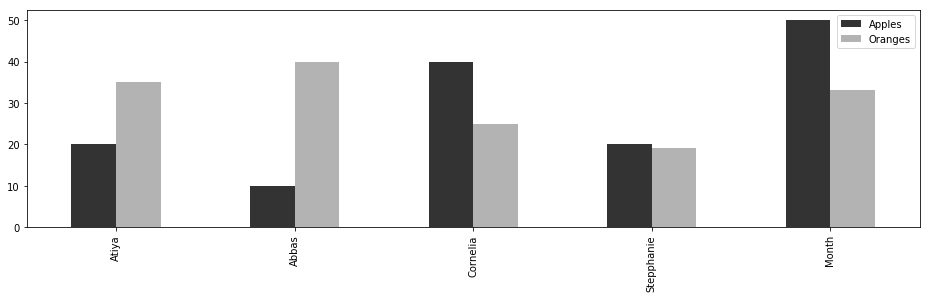

In [99]:
color = ['.2', '.7']
df.plot(kind = 'bar', color = color, figsize=(16,4))

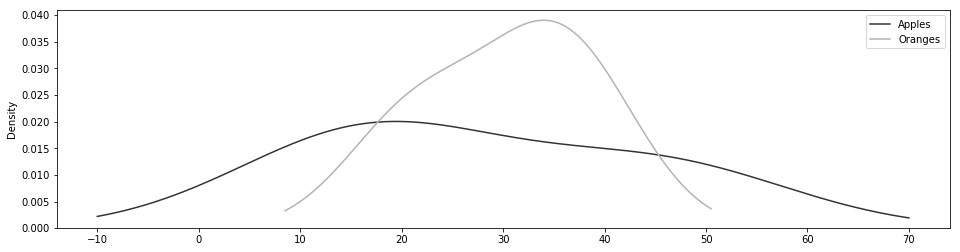

In [100]:
df.plot(kind='kde', color = color , figsize= (16, 4))

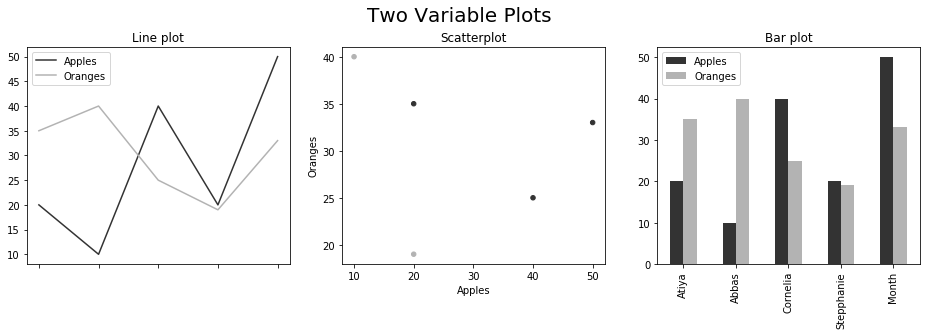

In [102]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,4))
fig.suptitle('Two Variable Plots', size =20, y = 1.02)
df.plot(kind='line', color = color, ax = ax1, title = 'Line plot')
df.plot(x = 'Apples', y = 'Oranges', kind = 'scatter', color = color, ax = ax2, title= 'Scatterplot')
df.plot(kind='bar', color = color, ax = ax3, title = 'Bar plot')

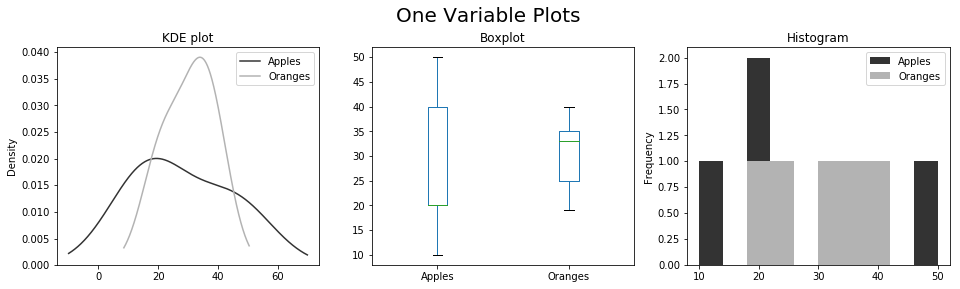

In [103]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (16, 4))
fig.suptitle('One Variable Plots', size = 20, y=1.02)
df.plot(kind = 'kde', color = color, ax= ax1, title = 'KDE plot')
df.plot(kind = 'box', ax= ax2, title = 'Boxplot')
df.plot(kind= 'hist', color = color, ax = ax3, title = 'Histogram')

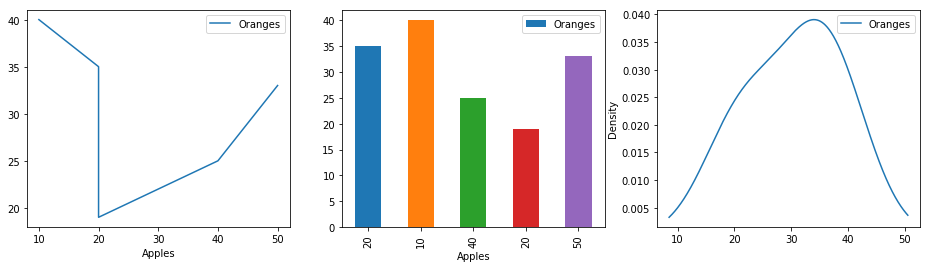

In [107]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 4))
df.sort_values('Apples').plot(x = 'Apples', y='Oranges', kind = 'line', ax= ax1)
df.plot(x = 'Apples', y = 'Oranges', kind = 'bar', ax = ax2)
df.plot(x = 'Apples', kind = 'kde', ax =ax3)

- 시각화에 대한 pandas의 공식문서 : http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 비행 데이터셋 시각화

In [109]:
flights = pd.read_csv(pwd + '/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [111]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
flights['ON_TIME'] = 1 - flights[cols].any(axis = 1)

cols.append('ON_TIME')
status = flights[cols].sum()
status

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

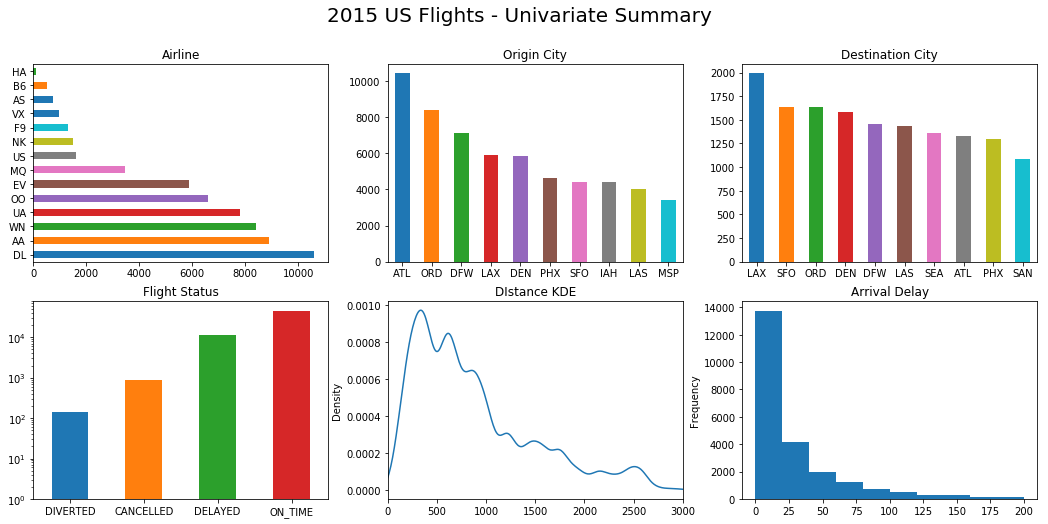

In [116]:
fig, ax_array = plt.subplots(2, 3, figsize = (18, 8))
(ax1, ax2, ax3), (ax4, ax5, ax6)  = ax_array

fig.suptitle('2015 US Flights - Univariate Summary', size = 20)

ax = flights['AIRLINE'].value_counts()
ax.plot(kind = 'barh', ax = ax1, title= 'Airline')

oc = flights['ORG_AIR'].value_counts()
oc.plot(kind = 'bar', ax=ax2, rot = 0, title= 'Origin City')

dv = flights['DEST_AIR'].value_counts().head(10)
dv.plot(kind = 'bar', ax = ax3, rot = 0, title = 'Destination City')

status.plot(kind = 'bar', ax = ax4, rot = 0, log = True, title = 'Flight Status')
flights['DIST'].plot(kind = 'kde', ax= ax5, xlim = (0, 3000), title= 'DIstance KDE')

flights['ARR_DELAY'].plot(kind = 'hist', ax =ax6, title= 'Arrival Delay', range = (0, 200))

In [118]:
hour = flights['SCHED_DEP'] // 100
minute = flights['SCHED_DEP'] % 100
df_date = flights[['MONTH', 'DAY']].assign(YEAR = 2015, HOUR = hour, MINUTE = minute)

df_date.head()

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20


In [119]:
flight_dep = pd.to_datetime(df_date)
flight_dep.head()

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

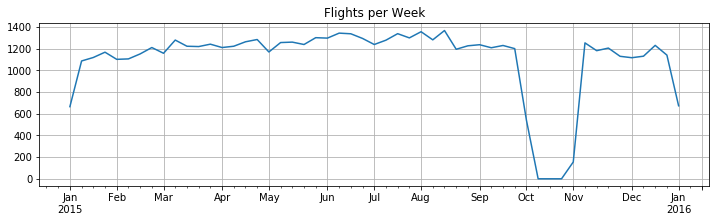

In [120]:
flights.index = flight_dep
fc = flights.resample('W').size()
fc.plot(figsize = (12, 3), title = 'Flights per Week', grid = True)

Text(0.5,1,'Flights per Week (Interpolated Missing Data)')

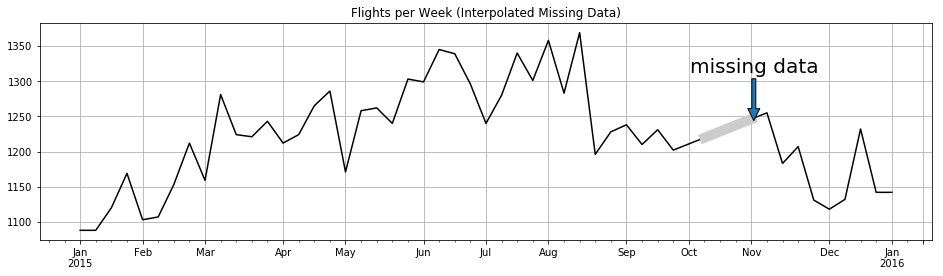

In [121]:
fc_miss = fc.where(fc > 1000)
fc_intp = fc_miss.interpolate(limit_direction = 'both')

ax = fc_intp.plot(color = 'black', figsize = (16, 4))
fc_intp[fc < 500].plot(linewidth = 10, grid = True, color = '.8', ax =ax)

ax.annotate(xy=(.8, .55), xytext=(.8, .77), xycoords = 'axes fraction', s = 'missing data', ha = 'center', size = 20, arrowprops = dict())

ax.set_title('Flights per Week (Interpolated Missing Data)')

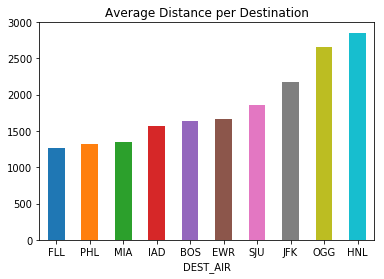

In [123]:
flights.groupby('DEST_AIR')['DIST'] \
    .agg(['mean', 'count']) \
    .query('count > 100') \
    .sort_values('mean') \
    .tail(10) \
    .plot(kind = 'bar', y = 'mean', rot = 0, legend = False, title = 'Average Distance per Destination')

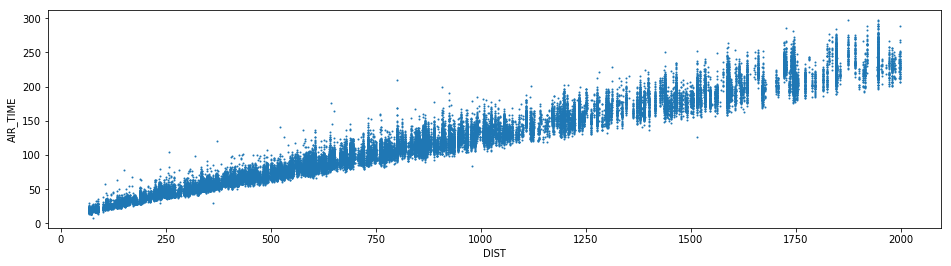

In [124]:
fs = flights.reset_index(drop = True)[['DIST', 'AIR_TIME']].query('DIST <= 2000').dropna()
fs.plot(x='DIST', y='AIR_TIME', kind = 'scatter', s=1, figsize = (16, 4))

In [126]:
fs['DIST_GROUP'] = pd.cut(fs['DIST'], bins = range(0, 2001, 250))
fs['DIST_GROUP'].value_counts().sort_index()

(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: DIST_GROUP, dtype: int64

In [129]:
normalize = lambda x: (x - x.mean()) / x.std()
fs['TIME_SCORE'] = fs.groupby('DIST_GROUP')['AIR_TIME'].transform(normalize)

fs.head()

,DIST,AIR_TIME,DIST_GROUP,TIME_SCORE
0,590,94.0,"(500, 750]",0.490966
1,1452,154.0,"(1250, 1500]",-1.267551
2,641,85.0,"(500, 750]",-0.296749
3,1192,126.0,"(1000, 1250]",-1.211020
4,1363,166.0,"(1250, 1500]",-0.521999


Text(0.5,0.98,'')

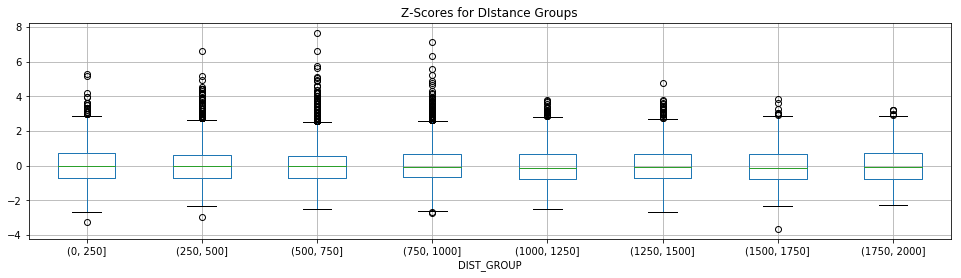

In [130]:
ax = fs.boxplot(by = 'DIST_GROUP', column = 'TIME_SCORE', figsize= (16,4))
ax.set_title('Z-Scores for DIstance Groups')
ax.figure.suptitle('')

In [135]:
outliers = flights.iloc[fs[fs['TIME_SCORE'] > 6].index]
outliers = outliers[['AIRLINE', 'ORG_AIR', 'DEST_AIR', 'DIST', 'AIR_TIME', 'ARR_DELAY', 'DIVERTED']]
outliers['PLOT_NUM'] = range(1, len(outliers) + 1)
outliers

,AIRLINE,ORG_AIR,DEST_AIR,DIST,AIR_TIME,ARR_DELAY,DIVERTED,PLOT_NUM
2015-04-08 09:40:00,DL,ATL,CVG,373,121.0,54.0,0,1
2015-05-25 16:30:00,F9,MSP,ATL,907,199.0,79.0,0,2
2015-09-10 20:00:00,UA,IAH,MCI,643,176.0,76.0,0,3
2015-12-10 19:53:00,OO,PHX,SFO,651,164.0,146.0,0,4
2015-12-26 09:15:00,NK,ORD,DFW,802,210.0,98.0,0,5


Text(0.5,1,'Flight Time vs Distance with Outliers')

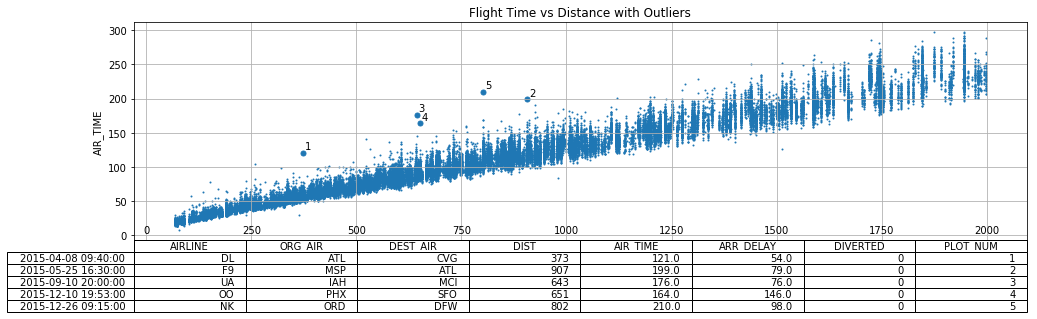

In [138]:
ax = fs.plot(x= 'DIST', y='AIR_TIME', kind= 'scatter', s=1, figsize = (16, 4), table = outliers)
outliers.plot(x='DIST', y='AIR_TIME', kind= 'scatter', s=25, ax=ax, grid = True  )
outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]

for t, d, n in outs.itertuples(index = False):
    ax.text(d+5, t+5, str(n))
    
plt.setp(ax.get_xticklabels(), y=.1)
plt.setp(ax.get_xticklines(), visible = False)
ax.set_xlabel('')
ax.set_title('Flight Time vs Distance with Outliers')

- 표로 도식화하는 pandas 공식문서 : http://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-tables

### 영역 그래프를 스태킹해 새로운 추세 발견

### seaborn과 pandas의 차이점 이해

### seaborn Grid를 사용한 다변량 분석

### seaborn을 사용해 다이어몬드 데이터셋에 있는 심슨의 역설 발견